In [1]:
import duckdb
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import os
import sys

%config InlineBackend.figure_format = 'retina'

In [4]:
path = "C:\\Users\\alezi\\OneDrive\\Escritorio\\Geospatial Data\\final_proyect\\data_in"

In [2]:
con = duckdb.connect(database=":memory:")
con.execute(
    "CREATE VIEW 'gas_prices' AS SELECT * FROM 'C:/Users/alezi/OneDrive/Escritorio/Geospatial Data/final_proyect/data_in/spanish_gas_prices.parquet';"
)


In [3]:
# We use DESCRIBE to fetch the column names and column types
con.execute("DESCRIBE SELECT * FROM 'gas_prices';").fetchall()

[('station_id', 'BIGINT', 'YES', None, None, None),
 ('date', 'DATE', 'YES', None, None, None),
 ('gasoline_95E5', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('gasoline_95E5_premium', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('gasoline_95E10', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('gasoline_98E5', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('gasoline_98E10', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('diesel_A', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('diesel_B', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('diesel_premium', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('bioetanol', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('biodiesel', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('lpg', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('cng', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('lng', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('hydrogen', 'DECIMAL(38,9)', 'YES', None, None, None),
 ('name', 'VARCHAR', 'YES', None, None, None),
 ('address', 'VARCHAR', 'YES', 

In [12]:
result = con.execute("SELECT DISTINCT province_name FROM gas_prices;")

# Fetch all the rows from the result
rows = result.fetchall()

# Extract the unique values for 'province_name' from the result
unique_province_names = [row[0] for row in rows]

# Print the unique province names
print(unique_province_names)

['ALICANTE', 'ASTURIAS', 'VALENCIA / VALÈNCIA', 'GUADALAJARA', 'JAÉN', 'LEÓN', 'SANTA CRUZ DE TENERIFE', 'ZARAGOZA', 'CÓRDOBA', 'CASTELLÓN / CASTELLÓ', 'CUENCA', 'NAVARRA', 'CÁCERES', 'GRANADA', 'GIRONA', 'TOLEDO', 'ARABA/ÁLAVA', 'MELILLA', 'LLEIDA', 'ALBACETE', 'CORUÑA (A)', 'BARCELONA', 'LUGO', 'BALEARS (ILLES)', 'SORIA', 'ÁVILA', 'OURENSE', 'CANTABRIA', 'RIOJA (LA)', 'CIUDAD REAL', 'MURCIA', 'HUELVA', 'CÁDIZ', 'BADAJOZ', 'BIZKAIA', 'TARRAGONA', 'ZAMORA', 'VALLADOLID', 'MADRID', 'PALENCIA', 'SEVILLA', 'BURGOS', 'PONTEVEDRA', 'PALMAS (LAS)', 'MÁLAGA', 'ALMERÍA', 'SALAMANCA', 'HUESCA', 'SEGOVIA', 'CEUTA', 'TERUEL', 'GIPUZKOA']


In [13]:
# Execute a query to retrieve all the dataset rows where province_name is 'BARCELONA' (3 minutes)
result = con.execute("SELECT * FROM gas_prices WHERE province_name = 'BARCELONA';")

# Fetch all the rows from the result
rows = result.fetchall()

# Create a pandas DataFrame from the query result
df = pd.DataFrame(rows, columns=result.description)
df

,"(station_id, NUMBER, None, None, None, None, None)","(date, Date, None, None, None, None, None)","(gasoline_95E5, NUMBER, None, None, None, None, None)","(gasoline_95E5_premium, NUMBER, None, None, None, None, None)","(gasoline_95E10, NUMBER, None, None, None, None, None)","(gasoline_98E5, NUMBER, None, None, None, None, None)","(gasoline_98E10, NUMBER, None, None, None, None, None)","(diesel_A, NUMBER, None, None, None, None, None)","(diesel_B, NUMBER, None, None, None, None, None)","(diesel_premium, NUMBER, None, None, None, None, None)",...,"(road_side, STRING, None, None, None, None, None)","(restriction, STRING, None, None, None, None, None)","(sender, STRING, None, None, None, None, None)","(schedule, STRING, None, None, None, None, None)","(region_id, NUMBER, None, None, None, None, None)","(region_name, STRING, None, None, None, None, None)","(province_id, NUMBER, None, None, None, None, None)","(province_name, STRING, None, None, None, None, None)","(municipality_id, NUMBER, None, None, None, None, None)","(municipality_name, STRING, None, None, None, None, None)"
0,1865,2023-07-29,1.589000000,1.639000000,None,None,None,1.479000000,None,1.549000000,...,N,P,OM,L-D: 24H,9,Cataluña,8,BARCELONA,1141,Terrassa
1,13203,2023-07-29,1.569000000,None,None,None,None,1.429000000,None,1.479000000,...,D,P,dm,L-D: 24H,9,Cataluña,8,BARCELONA,1141,Terrassa
2,3042,2023-07-29,1.764000000,None,None,1.896000000,None,1.589000000,None,1.699000000,...,I,P,OM,L-D: 24H,9,Cataluña,8,BARCELONA,917,Castellbisbal
3,2095,2023-07-29,1.809000000,1.849000000,None,1.959000000,None,1.589000000,None,1.649000000,...,D,P,OM,L-D: 06:00-22:00,9,Cataluña,8,BARCELONA,897,Calella
4,12765,2023-07-29,1.589000000,None,None,None,None,1.399000000,None,None,...,D,P,dm,L-D: 24H,9,Cataluña,8,BARCELONA,965,Hospitalet de Llobregat (L')
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210185,3033,2007-01-01,0.987000000,None,None,1.087000000,None,0.938000000,None,0.988000000,...,N,P,OM,L-D: 06:00-22:00,9,Cataluña,8,BARCELONA,938,Cubelles
4210186,2516,2007-01-01,0.988000000,None,None,1.101000000,None,0.919000000,None,0.969000000,...,I,P,OM,L-D: 06:00-22:00,9,Cataluña,8,BARCELONA,1158,Vic
4210187,2531,2007-01-01,0.988000000,None,None,1.101000000,None,0.919000000,None,0.969000000,...,I,P,OM,L-D: 06:00-22:00,9,Cataluña,8,BARCELONA,1135,Tagamanent
4210188,1802,2007-01-01,0.985000000,None,None,1.098000000,None,0.931000000,None,0.981000000,...,N,P,OM,L-D: 24H,9,Cataluña,8,BARCELONA,1160,Viladecans


In [4]:
# Execute a query to retrieve all the dataset rows where province_name is 'BARCELONA' (3 minutes)
result = con.execute("SELECT * FROM gas_prices WHERE province_name = 'MADRID';")

# Fetch all the rows from the result
rows = result.fetchall()

# Create a pandas DataFrame from the query result
df = pd.DataFrame(rows, columns=result.description)
df

,"(station_id, NUMBER, None, None, None, None, None)","(date, Date, None, None, None, None, None)","(gasoline_95E5, NUMBER, None, None, None, None, None)","(gasoline_95E5_premium, NUMBER, None, None, None, None, None)","(gasoline_95E10, NUMBER, None, None, None, None, None)","(gasoline_98E5, NUMBER, None, None, None, None, None)","(gasoline_98E10, NUMBER, None, None, None, None, None)","(diesel_A, NUMBER, None, None, None, None, None)","(diesel_B, NUMBER, None, None, None, None, None)","(diesel_premium, NUMBER, None, None, None, None, None)",...,"(road_side, STRING, None, None, None, None, None)","(restriction, STRING, None, None, None, None, None)","(sender, STRING, None, None, None, None, None)","(schedule, STRING, None, None, None, None, None)","(region_id, NUMBER, None, None, None, None, None)","(region_name, STRING, None, None, None, None, None)","(province_id, NUMBER, None, None, None, None, None)","(province_name, STRING, None, None, None, None, None)","(municipality_id, NUMBER, None, None, None, None, None)","(municipality_name, STRING, None, None, None, None, None)"
0,14661,2023-07-29,1.569000000,None,None,None,None,1.369000000,None,None,...,D,P,dm,L-D: 24H,13,Madrid,28,MADRID,4418,Torrejón de Ardoz
1,14740,2023-07-29,1.569000000,None,None,None,None,1.419000000,None,1.429000000,...,N,P,dm,L-D: 24H,13,Madrid,28,MADRID,4328,Daganzo de Arriba
2,3075,2023-07-29,1.709000000,None,None,1.854000000,None,1.559000000,None,1.609000000,...,N,P,OM,L-D: 24H,13,Madrid,28,MADRID,4432,Valdemoro
3,3148,2023-07-29,1.709000000,None,None,None,None,1.579000000,1.329000000,1.659000000,...,I,P,dm,L-V: 07:00-23:00; S: 08:00-22:00; D: 09:00-22:00,13,Madrid,28,MADRID,4420,Torrejón de Velasco
4,13525,2023-07-29,1.589000000,None,None,None,None,1.399000000,None,None,...,N,P,dm,L-S: 06:00-00:00; D: 08:00-00:00,13,Madrid,28,MADRID,4317,Ciempozuelos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3852092,10614,2007-01-01,0.970000000,None,None,1.083000000,None,0.926000000,None,0.976000000,...,N,P,OM,L-D: 24H,13,Madrid,28,MADRID,4326,Coslada
3852093,10565,2007-01-01,0.960000000,None,None,1.073000000,None,0.911000000,None,None,...,I,P,dm,L-V: 06:00-20:00; S-D: 09:00-14:00,13,Madrid,28,MADRID,4348,Humanes de Madrid
3852094,4642,2007-01-01,0.977000000,None,None,1.090000000,None,0.923000000,None,0.973000000,...,D,P,OM,L-D: 24H,13,Madrid,28,MADRID,4354,Madrid
3852095,4331,2007-01-01,0.972000000,None,None,1.085000000,None,0.923000000,None,0.973000000,...,D,P,OM,L-D: 24H,13,Madrid,28,MADRID,4402,San Fernando de Henares


In [12]:
df = df.reset_index(drop=True)

# Extract the first element of each multi-level column index
new_columns = [col[0] for col in df.columns]

In [7]:
# Using the SAMPLE query returns a random subset, which is slower than using the LIMIT where we will always get the first results.

stmt = """
    SELECT *
    FROM 'gas_prices'
    --USING SAMPLE 100 ROWS
    LIMIT 100
"""

df = con.execute(stmt).fetchdf()
df

,station_id,date,gasoline_95E5,gasoline_95E5_premium,gasoline_95E10,gasoline_98E5,gasoline_98E10,diesel_A,diesel_B,diesel_premium,...,road_side,restriction,sender,schedule,region_id,region_name,province_id,province_name,municipality_id,municipality_name
0,15614,2023-07-29,NaN,NaN,NaN,NaN,NaN,1.530,NaN,NaN,...,D,R,dm,L-D: 08:00-22:00,3,Asturias,33,ASTURIAS,5006,Oviedo
1,9021,2023-07-29,1.528,NaN,NaN,NaN,NaN,1.379,1.140,NaN,...,D,P,dm,L-D: 24H,10,Comunidad Valenciana,12,CASTELLÓN / CASTELLÓ,1904,Soneja
2,14984,2023-07-29,1.644,NaN,NaN,1.776,NaN,1.495,NaN,1.561,...,D,P,dm,L-D: 24H,10,Comunidad Valenciana,46,VALENCIA / VALÈNCIA,7183,Sagunto/Sagunt
3,14743,2023-07-29,1.540,NaN,NaN,NaN,NaN,1.370,NaN,1.420,...,D,P,dm,L-D: 06:00-22:00,1,Andalucia,4,ALMERÍA,317,Ejido (El)
4,12614,2023-07-29,1.548,NaN,NaN,NaN,NaN,1.448,NaN,NaN,...,I,P,dm,L-D: 24H,1,Andalucia,41,SEVILLA,6128,Paradas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10716,2023-07-29,1.508,NaN,NaN,1.839,NaN,1.358,NaN,1.418,...,D,P,dm,L-D: 24H,9,Cataluña,43,TARRAGONA,6430,Montblanc
96,3042,2023-07-29,1.764,NaN,NaN,1.896,NaN,1.589,NaN,1.699,...,I,P,OM,L-D: 24H,9,Cataluña,8,BARCELONA,917,Castellbisbal
97,1094,2023-07-29,1.784,NaN,NaN,NaN,NaN,1.639,NaN,1.699,...,D,P,OM,L-D: 24H,6,Cantabria,39,CANTABRIA,5805,Ribamontán al Monte
98,12073,2023-07-29,1.472,NaN,NaN,NaN,NaN,1.335,0.961,NaN,...,I,P,dm,L-V: 09:00-18:00,2,Aragón,22,HUESCA,3426,Peñalba


In [8]:
# Exclude all those gas stations that are not in the mainland (Balearic and Canary Islands, Ceuta and Melilla), because they might have different taxes and logistics
# Gas station sells to the general public and is not restricted to partners or similar
stmt = """
    SELECT
      AVG(diesel_A) AS 'diesel_A',
      AVG(gasoline_95E5) AS 'gasoline_95E5',
      date
    FROM 'gas_prices'
    WHERE region_name NOT IN ('Melilla', 'Ceuta', 'Canarias', 'Baleares')
      AND restriction = 'P'
    GROUP BY date
"""

df = con.execute(stmt).fetchdf()
# plotting libreary seaborn favors long-format dataframes (https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data)
df = pd.melt(df, id_vars=["date"], value_vars=["diesel_A", "gasoline_95E5"])

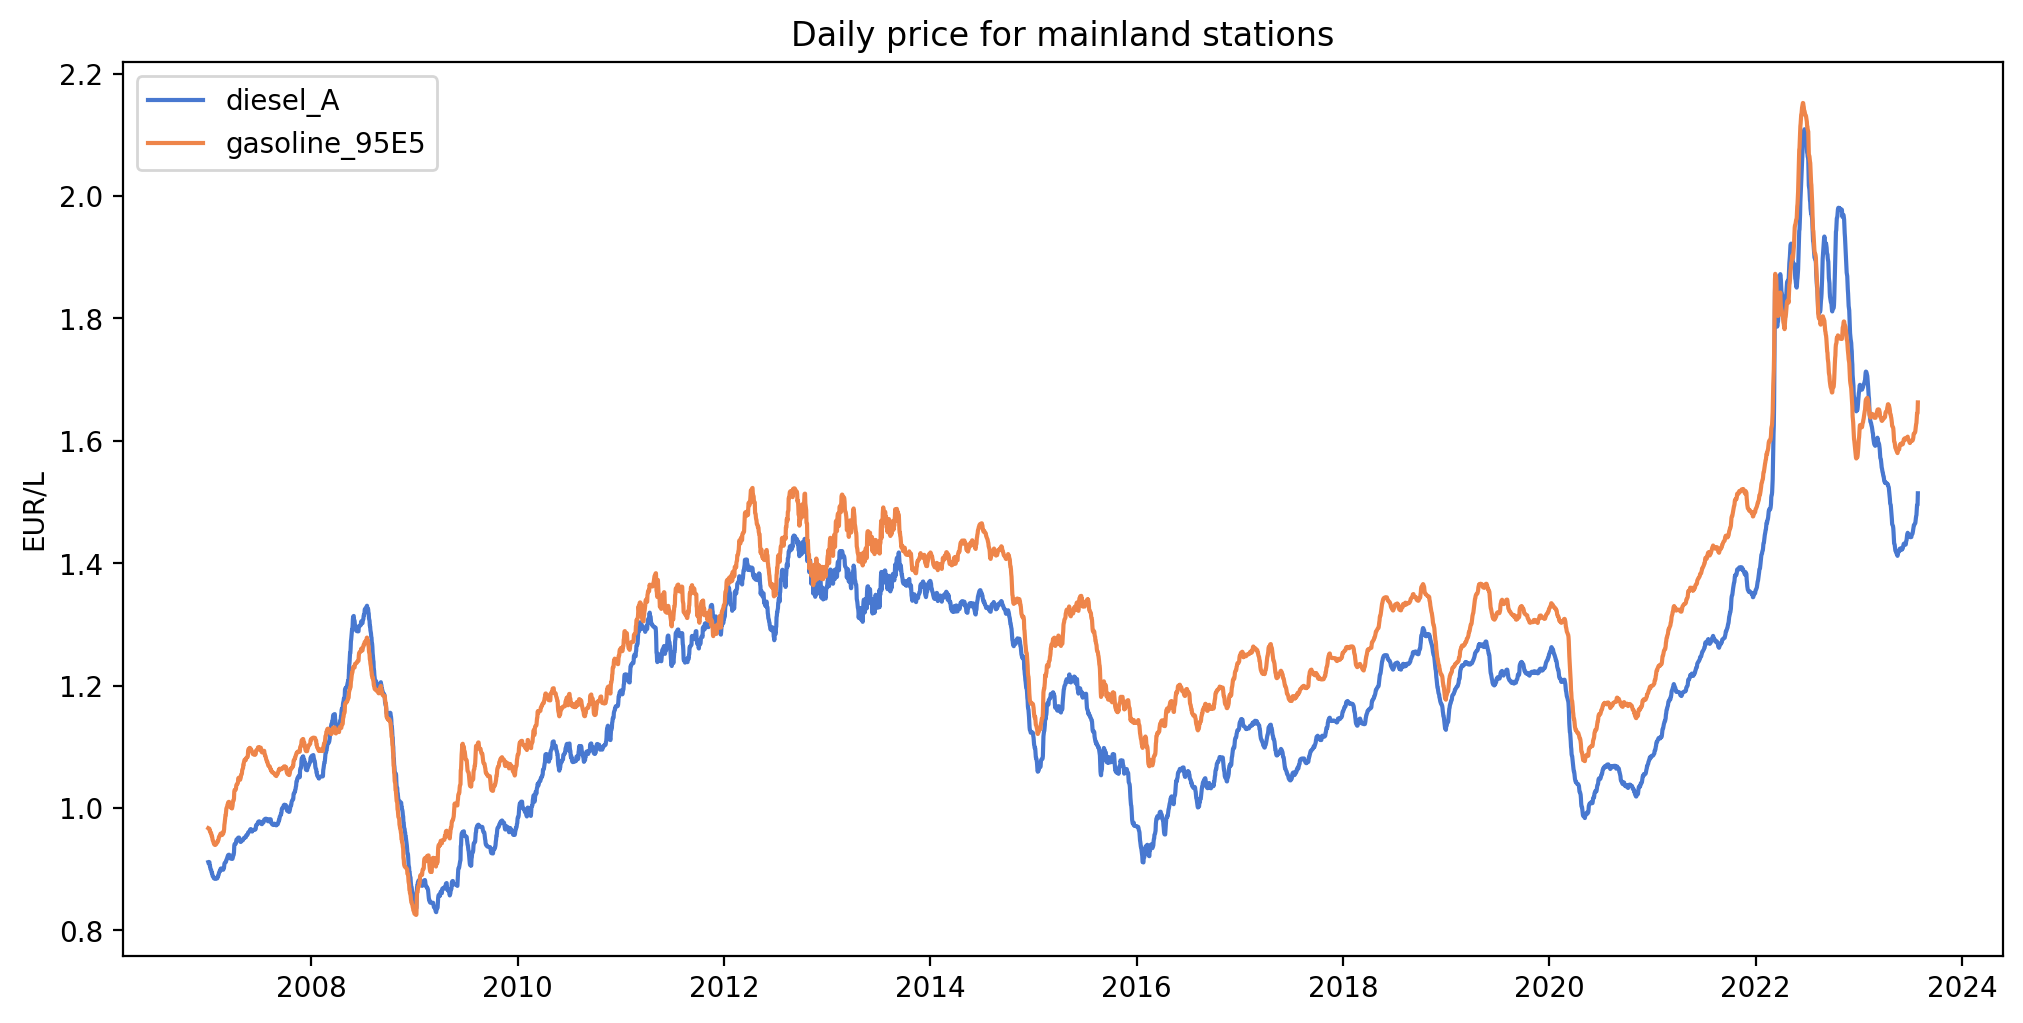

In [9]:
_, ax = plt.subplots(nrows=1, figsize=(10, 5), constrained_layout=True)
sns.lineplot(
    x="date",
    y="value",
    hue="variable",
    data=df,
    ax=ax,
    palette="muted",
)
ax.set(
    title="Daily price for mainland stations",
    xlabel="",
    ylabel="EUR/L",
)
sns.move_legend(ax, "upper left", title=None)

In [10]:
# We can look at the share of ownership for each company and year, however the only info we can use to that end is the name of the station. That means we will need to do some string cleaning in those cases company names are mixed with location or extra names:
stmt = """
    WITH stations AS (
      SELECT 
        YEAR(date) AS 'date',
        station_id,
        (CASE
           WHEN TRIM(name) LIKE '%BP%' THEN 'BP'
           WHEN TRIM(name) LIKE '%CEPSA%' THEN 'CEPSA'
           WHEN TRIM(name) LIKE '%GALP%' THEN 'GALP'
           WHEN TRIM(name) LIKE '%CAMPSA%' THEN 'CAMPSA'
           WHEN TRIM(name) LIKE '%REPSOL%' THEN 'REPSOL'
           WHEN TRIM(name) LIKE '%AVIA%' THEN 'AVIA'
           WHEN TRIM(name) LIKE '%SHELL%' THEN 'SHELL'
           ELSE TRIM(name) END
      ) AS 'name'
      FROM 'gas_prices'
      GROUP BY YEAR(date), station_id, name
    ),
    total_stations AS (
      SELECT date, COUNT(*) AS 'count'
      FROM (
        SELECT YEAR(date) AS 'date', station_id
        FROM 'gas_prices'
        GROUP BY YEAR(date), station_id
      )
      GROUP BY date
    )
    
    SELECT
      stations.date,
      name,
      (CASE
         WHEN name IN ('BP', 'CEPSA', 'GALP', 'PETRONOR', 'REPSOL', 'SHELL') THEN TRUE
         ELSE FALSE END
      ) AS 'is_major',
      ROUND(COUNT(*)::DECIMAL / MAX(total_stations.count) * 100, 1) AS 'share',
      COUNT(*) AS 'count'
    FROM stations, total_stations
    WHERE stations.date = total_stations.date
    GROUP BY stations.date, name
    --HAVING share > 5
"""

df = con.execute(stmt).fetchdf()
df["is_major"] = df["is_major"].astype("category")
df["name"] = df["name"].astype("category")

df_ = df.loc[df["name"].isin(["BP", "CEPSA", "REPSOL"])].pivot(
    index=["name"], columns="date", values="share"
)
df_.loc["__TOTAL__"] = df_.sum(axis=0)
df_

date,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
name,,,,,,,,,,,,,,,,,
CEPSA,15.4,16.3,16.4,16.2,16.1,16.0,15.6,15.0,14.6,14.3,14.0,13.9,13.7,13.5,13.3,12.4,12.2
BP,6.6,6.9,7.0,7.0,7.1,7.0,7.2,7.1,7.1,7.0,6.9,6.9,6.8,6.8,6.7,6.1,6.0
REPSOL,32.6,30.9,31.0,31.3,31.0,30.7,30.4,30.1,29.3,28.4,27.8,27.3,26.9,26.5,26.0,23.6,23.5
__TOTAL__,54.6,54.1,54.4,54.5,54.2,53.7,53.2,52.2,51.0,49.7,48.7,48.1,47.4,46.8,46.0,42.1,41.7


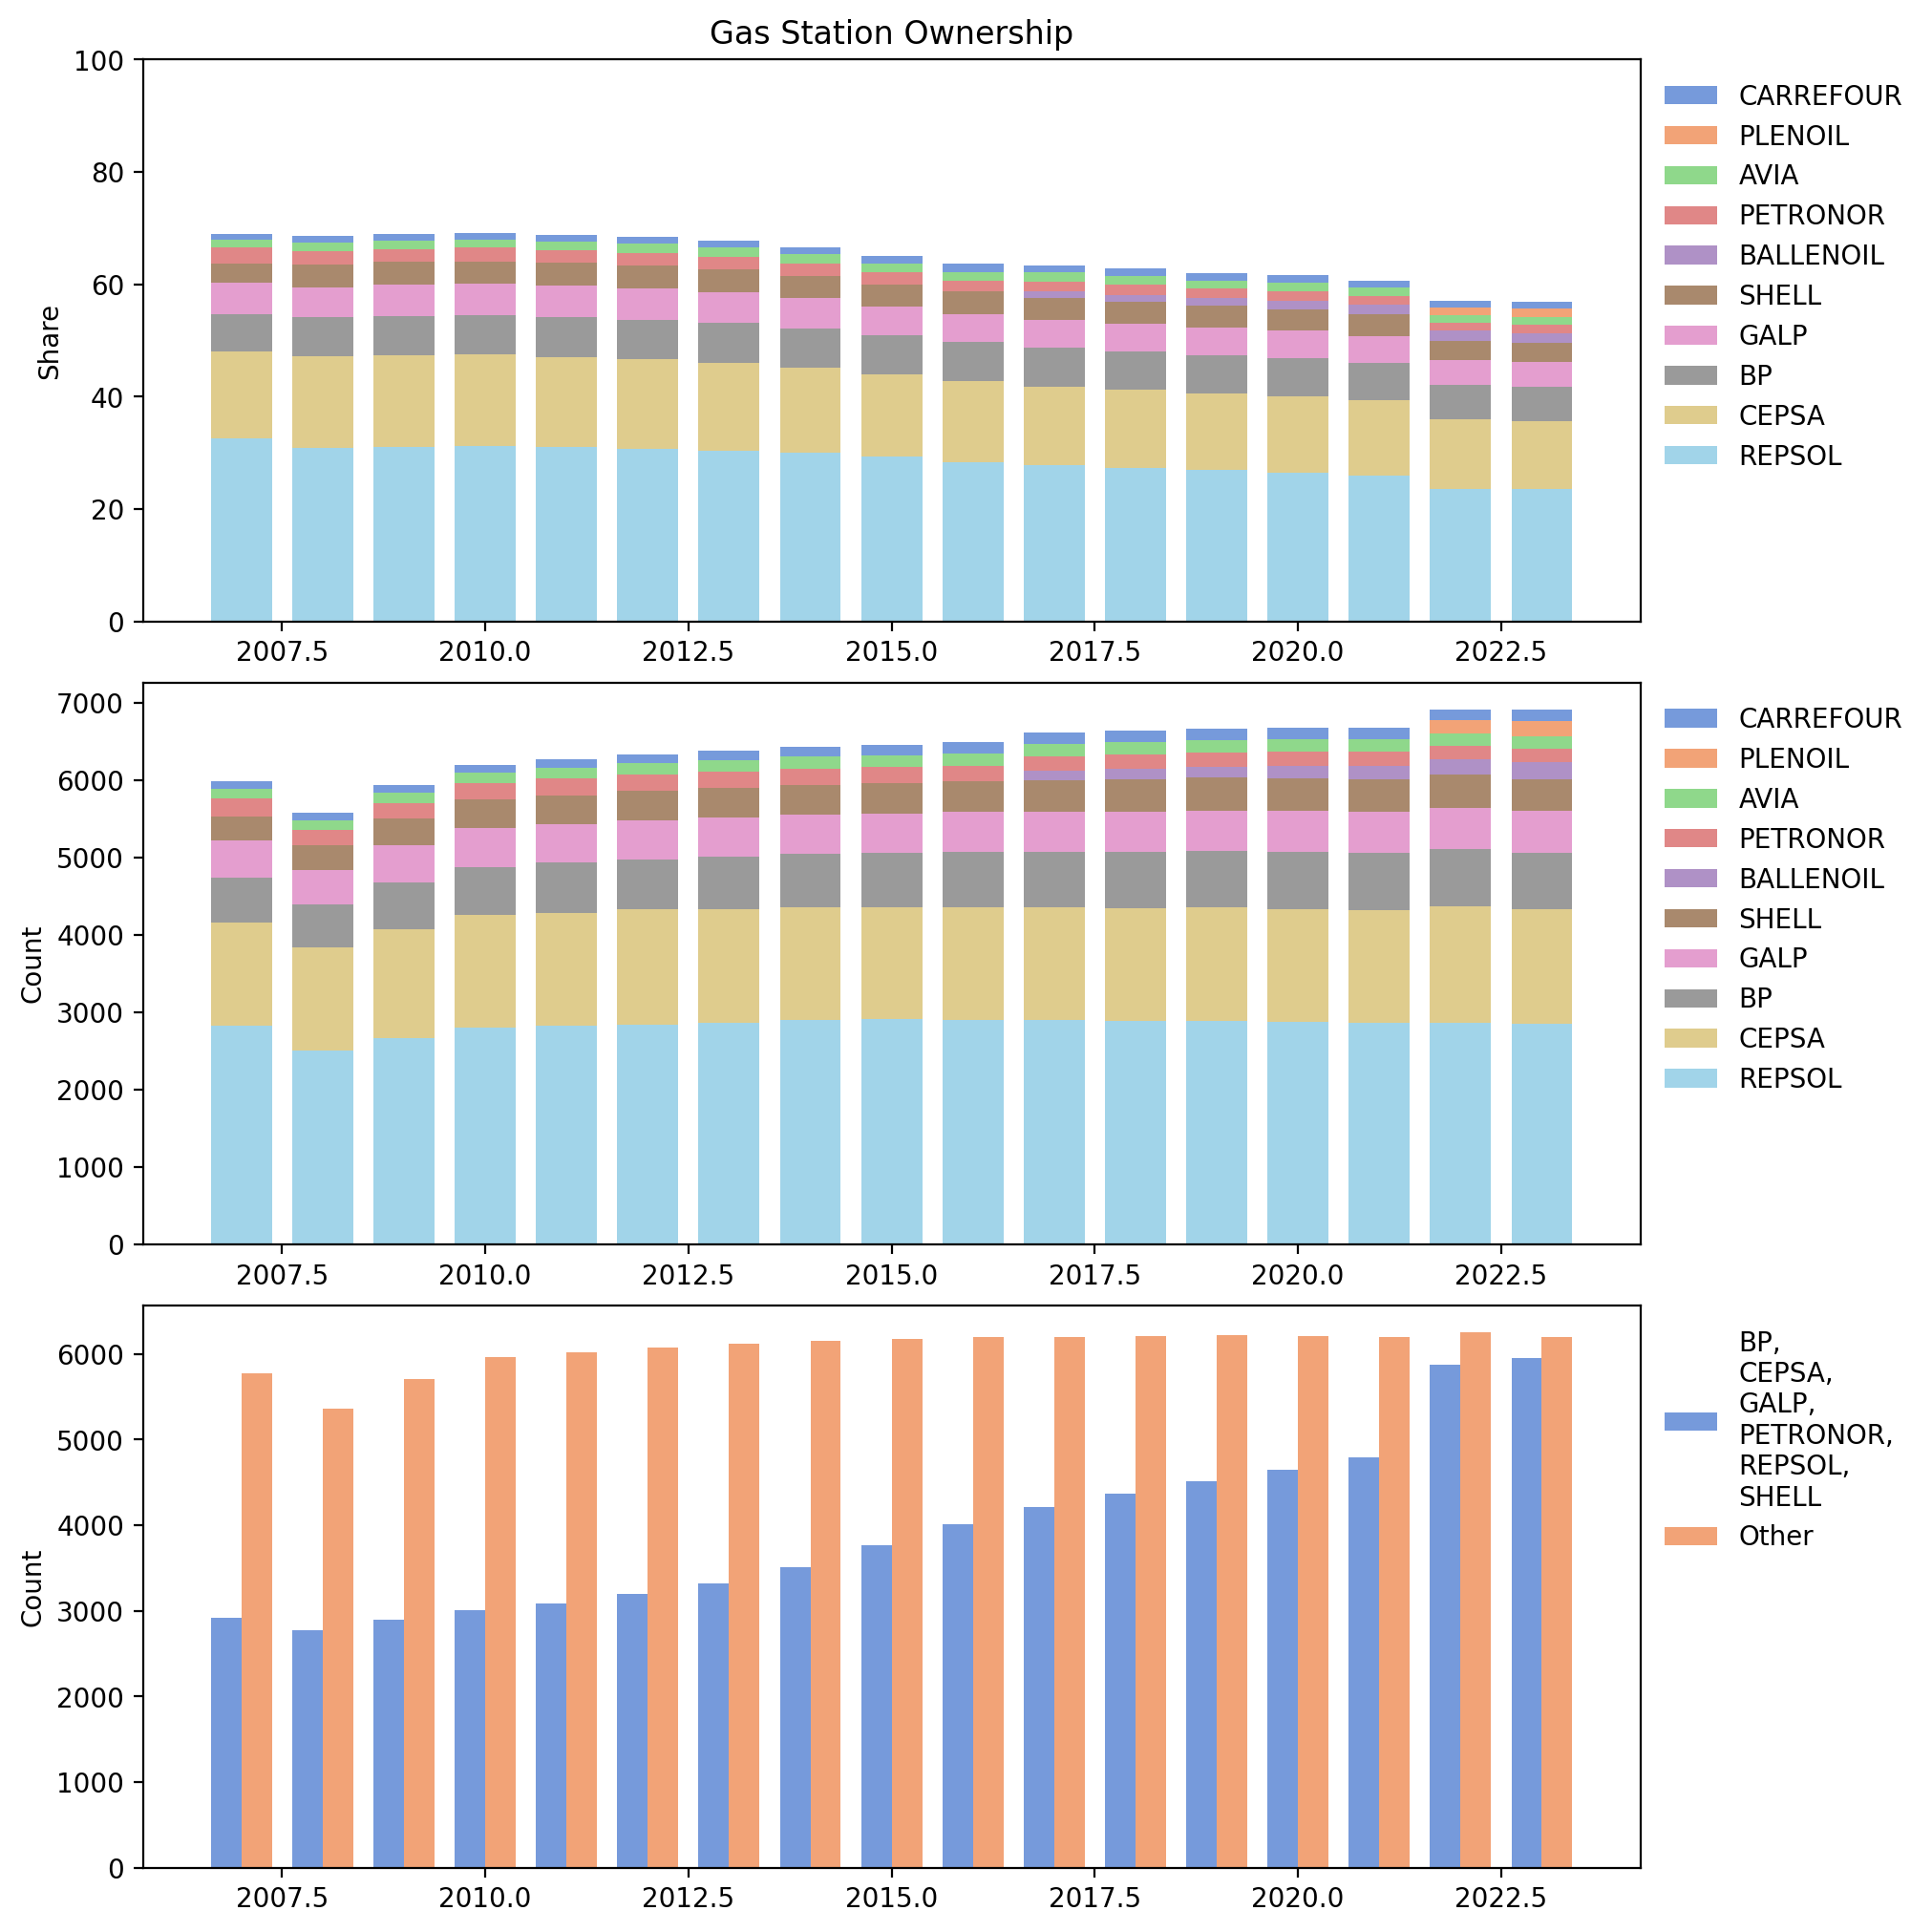

In [11]:
_, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 10), constrained_layout=True)
hue_order = df.loc[(df["share"] > 1) & (df["date"] == 2022)].sort_values(
    "share", ascending=True
)["name"]
sns.histplot(
    df.loc[df["share"] > 1],
    x="date",
    hue="name",
    weights="share",
    multiple="stack",
    discrete=True,
    palette="muted",
    shrink=0.75,
    linewidth=0.0,
    hue_order=hue_order,
    ax=ax1,
)
ax1.set(xlabel="", ylabel="Share", ylim=[0, 100], title="Gas Station Ownership")
sns.move_legend(
    ax1, "upper left", bbox_to_anchor=(1, 1), ncol=1, title=None, frameon=False
)

hue_order = df.loc[(df["share"] > 1) & (df["date"] == 2022)].sort_values(
    "share", ascending=True
)["name"]
sns.histplot(
    df.loc[df["share"] > 1],
    x="date",
    hue="name",
    weights="count",
    multiple="stack",
    discrete=True,
    palette="muted",
    shrink=0.75,
    linewidth=0.0,
    hue_order=hue_order,
    ax=ax2,
)
ax2.set(xlabel="", ylabel="Count")
sns.move_legend(
    ax2, "upper left", bbox_to_anchor=(1, 1), ncol=1, title=None, frameon=False
)

sns.histplot(
    df,
    x="date",
    hue="is_major",
    weights="count",
    multiple="dodge",
    discrete=True,
    palette="muted",
    shrink=0.75,
    linewidth=0.0,
    ax=ax3,
)
ax3.set(xlabel="", ylabel="Count")
sns.move_legend(
    ax3,
    "upper left",
    bbox_to_anchor=(1, 1),
    ncol=1,
    title=None,
    frameon=False,
    labels=["BP,\nCEPSA,\nGALP,\nPETRONOR,\nREPSOL,\nSHELL", "Other"],
)